<a href="https://colab.research.google.com/github/leolorenzoii/ml2_interpretability/blob/main/notebooks/02_Interpreting_Models_using_SHAP.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" align="left" alt="Open In Colab"/>
</a>

In [ ]:
# # Run this cell if using Google Colab, then restart your kernel
# !pip install -r https://raw.githubusercontent.com/leolorenzoii/ml2_interpretability/main/requirements.txt

# Interpreting Models using SHAP

## Shapley Values

Shapley values are a concept of the cooperative game theory field, whose objective is to measure each player’s contribution to the game. The method for obtaining Shapley values was proposed by [Lloyd Shapley](https://www.degruyter.com/document/doi/10.1515/9781400881970-018/html) in 1953. Shapley values emerge from the context where *n* players participate collectively obtaining a reward *p* which is intended to be fairly distributed at each one of the *n* players according to the individual contribution, such a contribution is a **Shapley value**.

In simple words, a Shapley value is the average marginal contribution of an instance of a feature among all possible coalitions. 

## The big BUT

Machine Learning models usually have a **large** number of features where each feature is a discrete or continuous variable, this causes it to be computationally very complicated to calculate Shapley values for each instance of each feature, in fact, it is an **NP-hard problem**. One could imagine retraining the model on all possible combinations of features!

This is the point where SHAP becomes the **hero**! 

In the next section, we will see what SHAP is and its approach to the interpretability of ML models.

## SHAP

<div>
    <img src="images/shap.png" align="center" width="700"/>
</div>

### Definition

[SHAP (SHapley Additive exPlanations)](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) is truly a phenomenal work by Lundberg and Lee (2017). The abstract reads as follows:


> *Understanding **why** a model makes a certain prediction can be as **crucial** as the prediction’s accuracy in many applications. However, the highest accuracy for large modern datasets is often achieved by complex models that even experts struggle to interpret, such as ensemble or deep learning models, creating a __tension__ between __accuracy__ and __interpretability__. In response, various methods have recently been proposed to help users interpret the predictions of complex models, but it is often unclear how these methods are related and when one method is preferable over another. To address this problem, we present a unified framework for interpreting predictions, SHAP (SHapley Additive exPlanations). SHAP assigns each feature an importance value for a particular prediction. Its novel components include: (1) the identification of a new class of additive feature importance measures, and (2) theoretical results showing there is a unique solution in this class with a set of desirable properties. The new class unifies six existing methods, notable because several recent methods in the class lack the proposed desirable properties. Based on insights from this unification, we present new methods that show improved computational performance and/or better consistency with human intuition than previous approaches.*

SHAP is a technique developed by **Lundberg and Lee in 2017** for interpreting ML model predictions using Shapely values. The central principle of SHAP is to compute the Shapley values for each characteristic of the sample to be interpreted, where each Shapley value indicates the influence that the related feature has on the prediction.

The concept of SHAP is simple to grasp. That is, there is a Shapley value for *every feature*. But how does SHAP work?

We observed in the last notebook that calculating Shapley values for multiple features might become **intractable**. To prevent this, the authors developed **Kernel Shap**, an expanded and modified technique for calculating Shapley values based on linear [LIME](https://arxiv.org/pdf/1602.04938.pdf). But we won't get into specifics here!



### Different types of SHAP

Kernel Shap is a method that allows the calculation of Shapley values with much fewer coalition samples. Kernel Shap is based on a weighted linear regression where the coefficients of the solution are the Shapley values. To build the weighted linear model, *n* sample coalitions are taken, for each coalition, the prediction is obtained and the weight is calculated with the kernel shap. Finally, the weighted linear model is fit and the resulting coefficients are the Shapley values.

Kernel Shap is the only method model-agnostic for the calculation of Shapley values, that is, **Kernel Shap** can interpret any ML model regardless of its nature. On the other hand, the authors also proposed other variants to obtain Shapley values based on different types of models such as **Tree SHAP**, **Deep SHAP**, and **Linear SHAP**.

SHAP has a list of classes that again uses Shapley values to explain any machine learning model or python function. These classes are commonly referred to as explainers. This explainer generally takes the ML model and data as input and returns an explainer object, which has SHAP values. This  will then be used to plot various charts explained that we will show later on. 

Some of the frequently used explainers are as follows:


1. **KernelExplainer** - This explainer uses the Kernel SHAP method to explain the output of any function. Kernel SHAP is a method that uses a special weighted linear regression to compute the importance of each feature. The computed importance values are Shapley values from game theory and also coefficents from a local linear regression.
2. **LinearExplainer** - This explainer is used for linear models available from sklearn. It can account for the relationship between features as well.
3. **TreeExplainer** - Uses Tree SHAP algorithms to explain the output of ensemble tree models. Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence.
4. **DeepExplainer** - This explainer is designed for deep learning models created using Keras, TensorFlow, and PyTorch. It’s an enhanced version of the DeepLIFT algorithm where we measure conditional expectations of SHAP values based on a number of background samples.

Below is a list of all other available explainers with SHAP.

1. **AdditiveExplainer** - This explainer is used to explain Generalized Additive Models.
2. **BruteForceExplainer** - This explainer uses the brute force approach to find shap values which will try all possible parameter sequence.
3. **GradientExplainer** - This explainer is used for differentiable models which are based on the concept of expected gradients which itself is an extension of the integrated gradients method.
4. **PartitionExplainer** - This explainer calculates shap values recursively through trying a hierarchy of feature combinations. It can capture the relationship between a group of related features.
5. **PermutationExplainer** - This explainer iterates through all permutation of features in both forward and reverses directions. This explainer can take more time if tried with many samples.
6. **SamplingExplainer** - This explainer generates shap values based on assumption that features are independent and is an extension of an algorithm proposed in the paper "An Efficient Explanation of Individual Classifications using Game Theory".
7. **CoefficentExplainer** - This explainer returns model coefficients as shap values. It does not do any actual shap values calculation.
8. **LimeTabularExplainer** - This explainer simply wrap around LimeTabularExplainer from lime library. If you are interested in learning about lime then please feel free to check on our tutorial on the same from references section.
9. **MapleExplainer** - This explainer simply wraps MAPLE into shap interface.
10. **RandomExplainer** - This explainer simply returns random feature shap values.
11. **TreeGainExplainer** - This explainer returns global gain/Gini feature importances for tree models as shap values.
12. **TreeMapleExplainer** - This explainer provides a wrapper around tree MAPLE into shap interface.

<div class="alert alert-info">

**Note**

The drawback of the KernelExplainer is its long running time. If your model is a tree-based machine learning model, you should use the tree explainer `TreeExplainer()` that has been optimized to render fast results. If your model is a deep learning model, use the deep learning explainer `DeepExplainer()`. The SHAP Python module does not yet have specifically optimized algorithms for all types of algorithms.
</div>

### Different types of Charts in SHAP

Below is a list of available charts with SHAP, but today we will only focus on **1-3**.

1. **force_plot** - It plots shap values using additive force layout. It can help us see which features most positively or negatively contributed to prediction.
2. **summary_plot** - It creates a beeswarm plot of shap values distribution of each feature of the dataset.
3. **dependence_plot** - It shows relationship between feature value (X-axis) and its shape values (Y-axis).
4. **decision_plot** - It shows the path of how the model reached a particular decision based on shap values of individual features. The individual plotted line represents one sample of data and how it reached a particular prediction.
5. **multioutput_decision_plot** - Its decision plot for multi output models.
6. **image_plot** - It plots shape values for images.
7. **monitoring_plot** - It helps in monitoring the behavior of the model over time. It monitors the loss of model overtime.
8. **embedding_plot** - It projects shap values using PCA for 2D visualization.
9. **partial_dependence_plot** - It shows basic partial dependence plot for a feature.
10. **bar_plot** - It shows a bar plot of shap values impact on the prediction of a particular sample.
11. **waterfall_plot** - It shows a waterfall plot explaining a particular prediction of the model based on shap values. It kind of shows the path of how shap values were added to the base value to come to a particular prediction.
12. **text_plot** - It plots an explanation of text samples coloring text based on their shap values.

## SHAP in Action

Now let's see how SHAP is implemented in code! First we import the `shap` package and some required libraries.

*Do check out the latest [documentation](https://shap.readthedocs.io/en/latest/index.html) for more in-depth discussion and more examples!*

In [1]:
# Import required libraries
import shap
import pandas as pd

# Activate javascript
shap.initjs()

### A Regression Example

We first consider a regression example. Thankfully, `shap` has some readily available datasets from the package. We'll use the [`diabetes`](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) dataset as our reference dataset. See description below:

#### Diabetes dataset

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

`Number of Instances`: 442

`Number of Attributes`: First 10 columns are numeric predictive values

`Target`: Column 11 is a quantitative measure of disease progression one year after baseline

`Attribute Information`:
- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

#### Data Preparation and Model Fitting

In [2]:
# Load the dataset
X, y = shap.datasets.diabetes()

We preview that the dataset has been loaded correctly:

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

We will use a Random Forest Regressor model to make predictions on the diabetes disease progression. For simplicity and demonstration purposes, we fit the model on the whole available dataset.

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=10, n_estimators=100, n_jobs=-1)
model = model.fit(X, y)

To use `shap`, we first have to determine what variant we should use. In this case, since the Random Forest model is supported by the `shap.TreeExplainer()`, we use it as our explainer.

*Note: Although `TreeExplainer` has limited model support, is much much faster than `KernelExplainer` -  the model-agnostic implementation of SHAP.*

In [6]:
# define explainer, we use a TreeExplainer because our model is a tree model
explainer = shap.TreeExplainer(model)

# generate shap values
shap_values = explainer.shap_values(X)

We plot the feature importance of the model just for reference.

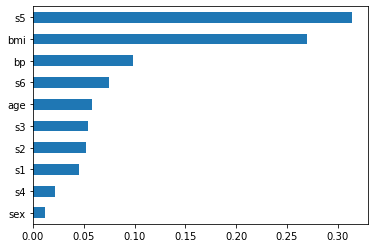

In [7]:
# print the feature importances, standard after a tree-based model 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh');

#### Force Plot

The force plot shows shap values contributions in generating final prediction using an additive force layout. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. 

***Code Specifics***

We can generate force plot using ``force_plot()`` method. Below are some of the parameters you may use for the ``force_plot()``.

```
Parameters
----------
base_value : float
    This is the reference value that the feature contributions start from. 
    For SHAP values it should be the value of explainer.expected_value.

shap_values : numpy.array
    Matrix of SHAP values (# features) or (# samples x # features). 
    If this is a 1D array then a single force plot will be drawn, if it is a 2D array then a stacked force plot will be drawn.

features : numpy.array
    Matrix of feature values (# features) or (# samples x # features). 
    This provides the values of all the features, and should be the same shape as the shap_values argument.

matplotlib : bool
    Whether to use the default Javascript output, or the (less developed) matplotlib output. 
    Using matplotlib can be helpful in scenarios where rendering Javascript/HTML is inconvenient. 
```

The below figure shows SHAP explanation force plots for a woman from the cervical cancer dataset.

In [8]:
shap.force_plot(explainer.expected_value, 
                shap_values[0], 
                X.columns)

In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

The baseline – the average **predicted** value – is 152.2. Diabetes predictors such as bmi are offset by decreasing effects such as s6.

In [9]:
# we can also print the shap values if we like
shap_vals = shap_values[0]

feature_importance = pd.DataFrame(list(zip(X.columns, shap_vals)),
                                  columns=['column_value', 'shap_vals'])

feature_importance.sort_values(by=['shap_vals'], 
                               ascending=False, 
                               inplace=True)

feature_importance

,column_value,shap_vals
2,bmi,22.950318
8,s5,19.607106
5,s2,1.897384
6,s3,1.370842
0,age,1.364973
4,s1,0.464008
3,bp,-0.587357
7,s4,-1.289659
1,sex,-1.498501
9,s6,-7.055222


#### Feature Importance

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want the global importance, we sum the absolute Shapley values per feature across the data.

***Code Specifics***

We can generate summary plot using `summary_plot()` method. Below are list of important parameters of `summary_plot()` method.

```
Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand

plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
    or "compact_dot".
    What type of summary plot to produce. Note that "compact_dot" is only used for
    SHAP interaction values.
```

Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the random forest trained before for predicting cervical cancer.

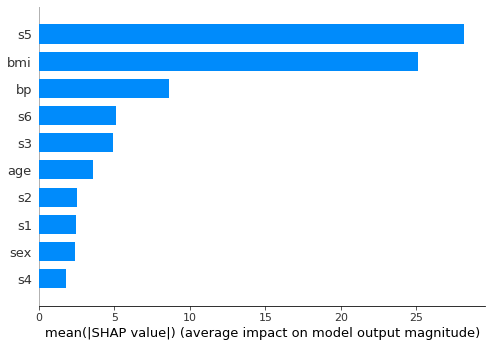

In [10]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values=shap_values, 
                  features=X, 
                  plot_type="bar")

SHAP feature importance measured as the mean absolute Shapley values. s5 was the most important feature.

SHAP feature importance is an alternative to permutation feature importance. There is a big difference between both importance measures: Permutation feature importance is based on the decrease in model performance. SHAP is based on magnitude of feature attributions.

The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot.

#### Summary Plot (Beeswarm Plot)

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

***Code Specifics***

We can generate summary plot using ``summary_plot()`` method. Below are list of important parameters of ``summary_plot()``.

```
Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand

plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
    or "compact_dot".
    What type of summary plot to produce. Note that "compact_dot" is only used for
    SHAP interaction values.
```

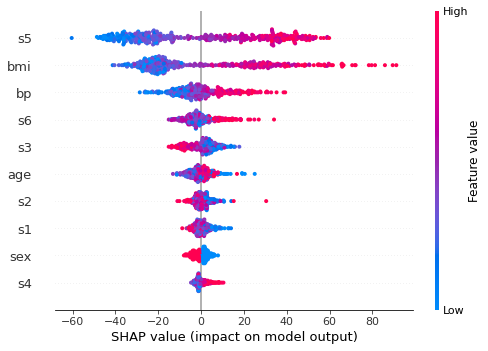

In [11]:
# summarize the effects of all the features
shap.summary_plot(shap_values = shap_values, 
                  features = X)

So what we have so far are explanations for individual predictions.

Shapley values can be combined into global explanations. If we run SHAP for every instance, we get a matrix of Shapley values. This matrix has one row per data instance and one column per feature. We can interpret the entire model by analyzing the Shapley values in this matrix.

In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

<div class='alert alert-info'>

**Reminder**
    
    
All effects describe the behavior of the model and are not necessarily causal in the real world.

</div>

#### Dependence Plot

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. 

- Each dot is a single prediction (row) from the dataset. Therefore one woman.
- The x-axis is the value of the feature from the X matrix.
- The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction.
- The color corresponds to a **second feature** that may have an interaction effect with the feature we are plotting. *By default this second feature is chosen automatically*. If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

SHAP dependence plots are an alternative to partial dependence plots (PDP) and accumulated local effects (ALE). While PDP and ALE plot show average effects, SHAP dependence also shows the variance on the y-axis. Especially in case of interactions, the SHAP dependence plot will be much more dispersed in the y-axis.

**Code Specifics**

We can generate summary plot using ``dependence_plot()`` method. Below are list of important parameters of ``dependence_plot()``.

```
Parameters
----------
ind : int or string
    If this is an int it is the index of the feature to plot. If this is a string it is
    either the name of the feature to plot, or it can have the form "rank(int)" to specify
    the feature with that rank (ordered by mean absolute SHAP value over all the samples).

shap_values : numpy.array
    Matrix of SHAP values (# samples x # features).

features : numpy.array or pandas.DataFrame
    Matrix of feature values (# samples x # features).

interaction_index : "auto", None, int, or string
    The index of the feature used to color the plot. The name of a feature can also be passed
    as a string. If "auto" then shap.common.approximate_interactions is used to pick what
    seems to be the strongest interaction (note that to find to true stongest interaction you
    need to compute the SHAP interaction values).
    
```

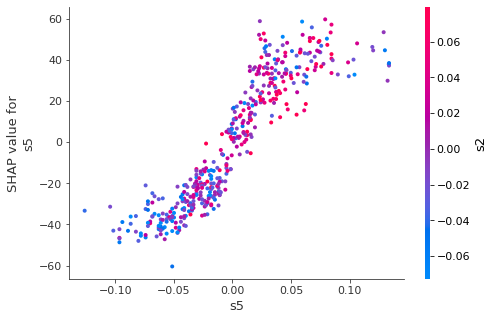

In [12]:
shap.dependence_plot(ind='s5', 
                     shap_values = shap_values, 
                     features = X)

Here, notice that `s5` has a non-linear relation with its Shapley value. Although, the general trend is that when `s5` increases, the model prediction for the disease outcome also increases. Notice also that although `s2` was the one tagged by SHAP as the feature with strongest interaction with `s5`, how their values vary with each other is unclear in this plot.

### A Classification Example

Implementation of SHAP on regressor is quite straightforward, since the model outcome is expected to have a continuous distribution. What happens when we apply SHAP on classification problems? Depending on what model we use and, correspondingly, the explainer that we use, SHAP can either use the log-odds or predicted probabilities as reference for the **gain** of the set of feature values.

Furthermore, for multiclass problems, depending on the underlying architecture of your model, SHAP may return multiple base values per class. To illustrate this, let's look at how we can apply SHAP on a multi-class problem using the UCI wine dataset.

In [13]:
from sklearn.datasets import load_wine

wine_data = load_wine()
print(wine_data['DESCR'][19:578])

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2



#### Data Preparation and Model Training

First, we retrieve the predictors and target of the wine dataset.

In [14]:
X = wine_data['data']
y = wine_data['target']
feature_names = wine_data['feature_names']

Let's preview the data to make sure that we computed it correctly:

In [15]:
pd.DataFrame(X, columns=feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [30]:
y[:5]

array([0, 0, 0, 0, 0])

Now, let's train a Random Forest Classifer.

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1337)
clf.fit(X, y);

Again, we can use `TreeExplainer` in this case.

In [36]:
# Define explainer, for this case, Tree Models does work, hence we
# prefer it over other explainer methodology
explainer = shap.TreeExplainer(clf, X)

In [37]:
# Generate shap values. Here, we set `check_additivity` is False, since
# during the explainer's computation, there's a slight mismatch between
# the computed shapley value and model prediction, i.e., the obtained
# Shapley values don't sum to the model predictions cleanly.
shap_values = explainer.shap_values(X, check_additivity=False)

Let's look at the computed `expected_value` of the `explainer`.

In [38]:
explainer.expected_value

array([0.3229, 0.4086, 0.2685])

Here, we have three different *base values*, one for each class. This is the case when we use Random Forest Classifier and use `TreeExplainer`. For other cases, for example using `KernelExplainer` on a `GradientBoostingClassifier`, we can get a different shape on the base value.

This means that when we generate the different Shapley value visualizations, we would need to generate 3 different plots, each specifying the corresponding class.

#### Force Plot

Let's look at the force plot first. Taking looking at the Shapley value of the last dataset, we get these three visualizations:

##### Class 0

In [39]:
shap.force_plot(explainer.expected_value[0], shap_values[0][-1], feature_names)

##### Class 1

In [40]:
shap.force_plot(explainer.expected_value[1], shap_values[1][-1], feature_names)

##### Class 2

In [41]:
shap.force_plot(explainer.expected_value[2], shap_values[2][-1], feature_names)

From the force, plot we can see that the model prediction is `Class 2`, we can further verify this by inspecting the `clf.predict` for this data point:

In [43]:
clf.predict([X[-1]])

array([2])

Furthermore, we see that for class `2` it was the value of the flavonoids that greatly pushed the prediction towards a `Class 2` outcome. Looking at the force plot for `Class 1`, we can say that the `color_intensity` value of the sample lead to it not being classified as `Class 1`. For the force plot at `Class 0`, we notice that `flavonoids` and `proline` has a similar impact on rejecting the sample onto this class.

#### Feature Importance

Now if we want to see which feature affects the model prediction on a global scale, we can use the summary plot in two ways. First, we look at the overall features:

##### Overall

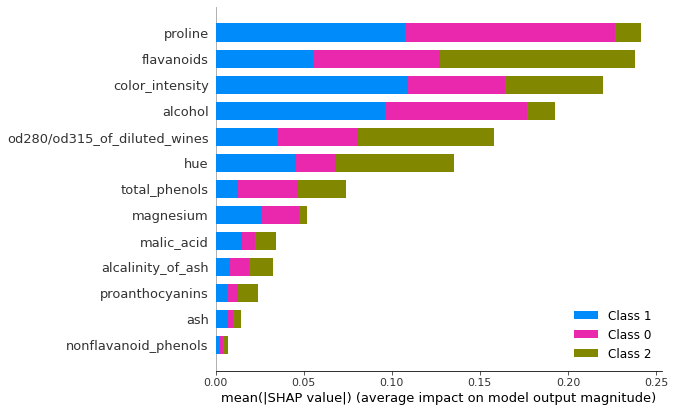

In [23]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values=shap_values, 
                  features=X, 
                  plot_type="bar",
                  feature_names=feature_names)

Here, we see that `proline` has the highest impact among all features. But this is due to the fact that it has high mean absolute Shapley value for `Class 1` and `Class 0`. Indeed, we see that with respect to `Class 2`, `proline` has low impact. We can clearly see this if we plot the mean absolute Shapley value per class:

##### Class 0

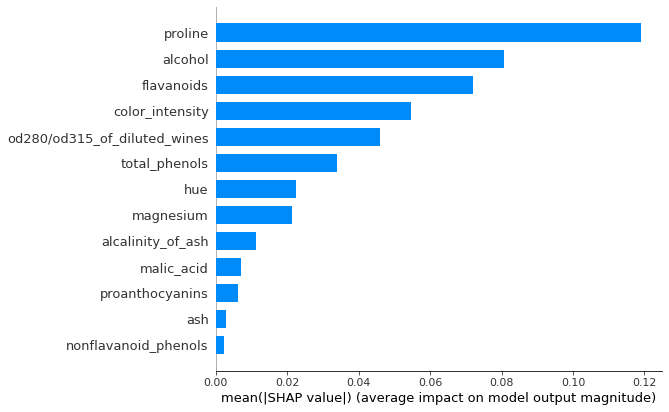

In [44]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values=shap_values[0], 
                  features=X, 
                  plot_type="bar",
                  feature_names=feature_names)

##### Class 1

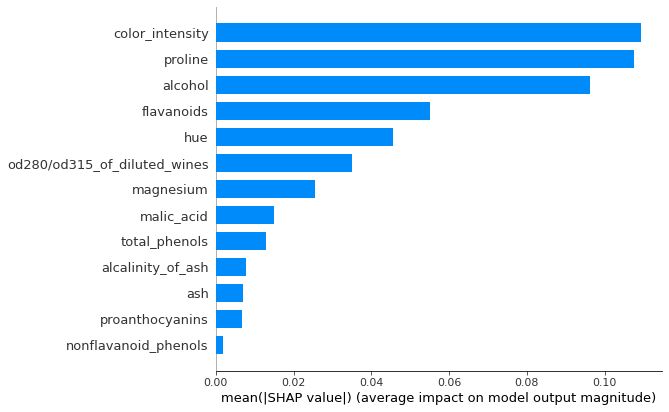

In [45]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values=shap_values[1], 
                  features=X, 
                  plot_type="bar",
                  feature_names=feature_names)

##### Class 2

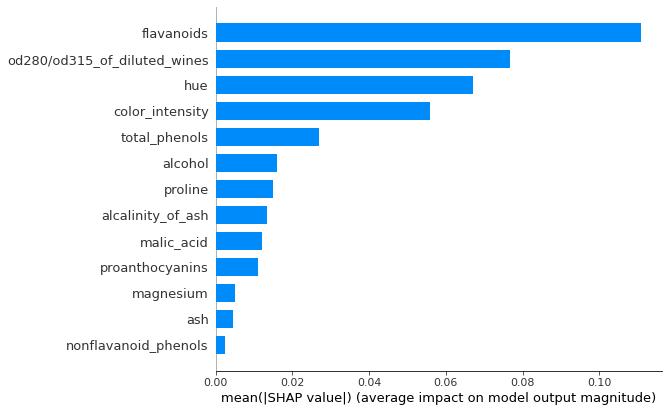

In [46]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values=shap_values[2], 
                  features=X, 
                  plot_type="bar",
                  feature_names=feature_names)

Notice for `Class 0` and `Class 1`, `proline` was at least at the top 2. For `Class 2`, it was the `flavonoids` that had the highest mean absolute Shapley value.

#### Summary Plot (Beeswarm Plot)

We can make more descriptive propositions when we look at the beeswarm plot.

##### Class 0

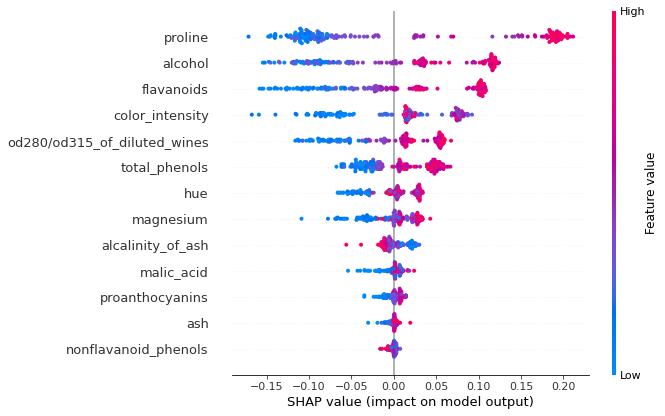

In [24]:
# summarize the effects of all the features
shap.summary_plot(shap_values=shap_values[0], 
                  features=X, feature_names=feature_names)

Class 0 is described by relatively high `proline`, `alcohol`, and `flavonoids` value. Notice the jitter of the `proline` above. There are two clusters, one with high values and lows values. In the plot above, we can clearly see that high values refer to higher Shapley value on Class 0.

##### Class 1

The opposite can be seen here. Low values of `proline` results in higher Shapley values for Class 1. Furthermore, Class 1 can also be characterized by low color intensity.

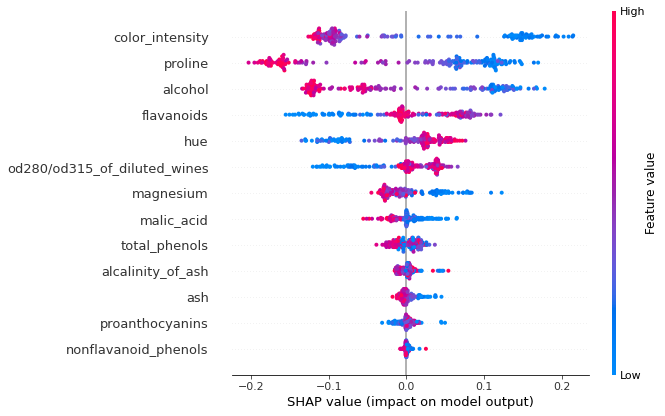

In [25]:
# summarize the effects of all the features
shap.summary_plot(shap_values=shap_values[1], 
                  features=X, feature_names=feature_names)

##### Class 2

Class 2 is characterized by relatively low flavonoids, low od280/od315, low hue, but high intensity.

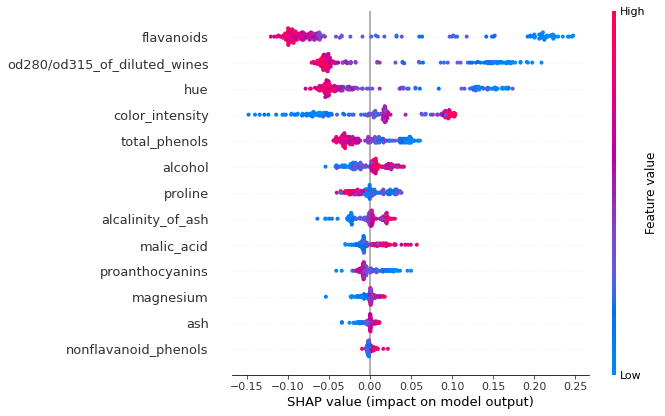

In [26]:
# summarize the effects of all the features
shap.summary_plot(shap_values=shap_values[2], 
                  features=X, feature_names=feature_names)

#### Dependence Plot

We can further delve deep on each feature by plotting the SHAP dependence plot.

##### Class 0

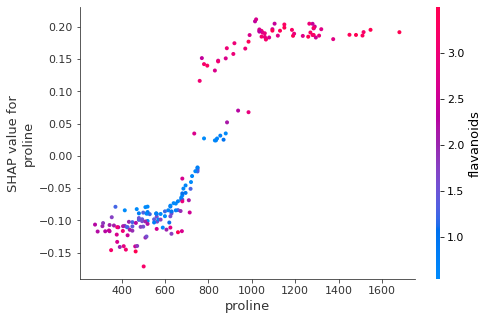

In [27]:
shap.dependence_plot(ind='proline', 
                     shap_values=shap_values[0],
                     features=X,
                     feature_names=feature_names)

##### Class 1

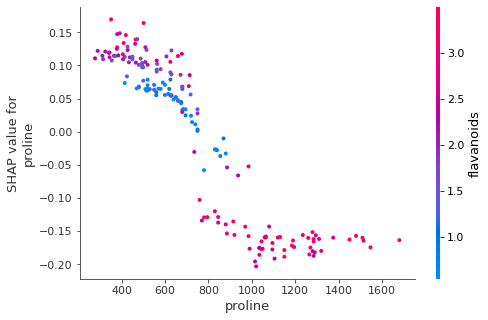

In [28]:
shap.dependence_plot(ind='proline', 
                     shap_values=shap_values[1],
                     features=X,
                     feature_names=feature_names)

##### Class 2

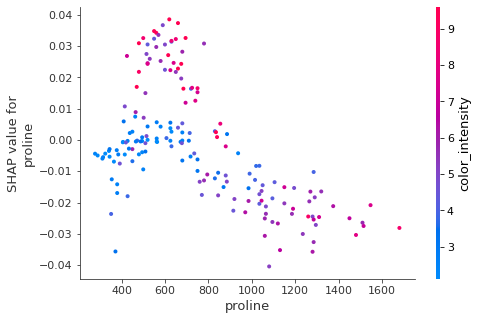

In [29]:
shap.dependence_plot(ind='proline', 
                     shap_values=shap_values[2],
                     features=X,
                     feature_names=feature_names)

For Class 0 and Class 1, we see a non-linear relationship between proline and the Shap value. Furthermore, the shapes of the dependence plot for `proline` for Class 0 and Class 1 are mirror image with one another. For Class 2, we can see that low values of `proline` with high color intensity yields to higher Shapley value. However, as the `proline` value increases, even though the color intensity stays high, the Shapley value significantly decreases.

## References
1. https://shap.readthedocs.io/en/latest/index.html
2. https://christophm.github.io/interpretable-ml-book/
3. https://coderzcolumn.com/tutorials/machine-learning/shap-explain-machine-learning-model-predictions-using-game-theoretic-approach
4. https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html